# Support Vector Machines

## 1. Social Network Ads

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

In [ ]:
# !pip install mglearn

In [1]:
import mglearn
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from utilities.evaluation import ModelEvaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [4]:
social = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/DS-ONLINE-76/master/data/Social_Network_Ads.csv",
                     dtype={"User ID": object})
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    object
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [6]:
social.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
social.describe(exclude="number")

,User ID,Gender
count,400,400
unique,400,2
top,15727467,Female
freq,1,204


3. Separa los datos de entrenamiento de los datos de prueba.

In [8]:
X = social.drop(["Purchased", "Gender"], axis=1)
y = social.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.70,
                                                    test_size=0.30, random_state=42)

In [10]:
X_train.drop("User ID", axis=1, inplace=True)
X_test.drop("User ID", axis=1, inplace=True)

c:\users\stiven.lopez\pycharmprojects\ds-online-76\venv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4. Estandariza los datos (`StandardScaler`).
5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [11]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [12]:
X_train

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [13]:
svm = SVC(kernel="linear", random_state=42).fit(X_train, y_train)

6. Realiza las predicciones sobre los datos de prueba.

In [14]:
predictions = svm.predict(X_test)

In [15]:
predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

7. Visualiza los resultados mediante:

* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [16]:
evaluation = ModelEvaluation(observed=y_test, predicted=predictions)
evaluation.generate_report()

,precision,recall,f1-score,support
0,0.81,0.99,0.89,73.00
1,0.97,0.64,0.77,47.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.89,0.81,0.83,120.00
weighted avg,0.87,0.85,0.84,120.00


In [18]:
evaluation.print_metrics()
evaluation.confusion_matrix(normalize=False)

El AUC es: 0.81
El accuracy es: 0.85
La precision es: 0.87
El recall es: 0.85
El F1 Score es: 0.84 



Predicted,0,1
Observed,,
0,72,1
1,17,30


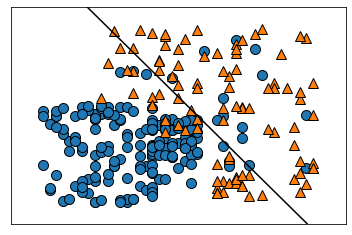

In [19]:
mglearn.plots.plot_2d_separator(classifier=svm, X=X_train)
mglearn.discrete_scatter(x1=X_train[:, 0], x2=X_train[:, 1], y=y_train)

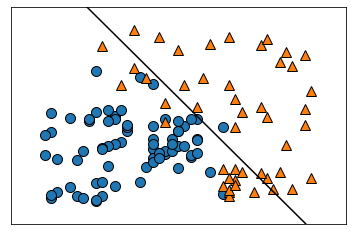

In [20]:
mglearn.plots.plot_2d_separator(classifier=svm, X=X_test)
mglearn.discrete_scatter(x1=X_test[:, 0], x2=X_test[:, 1], y=y_test)

In [21]:
svm = SVC().fit(X_train, y_train)

evaluation = ModelEvaluation(observed=y_test, predicted=svm.predict(X_test))
evaluation.print_metrics()
evaluation.confusion_matrix()

El AUC es: 0.94
El accuracy es: 0.94
La precision es: 0.94
El recall es: 0.94
El F1 Score es: 0.94 



Predicted,0,1
Observed,,
0,0.93,0.07
1,0.04,0.96


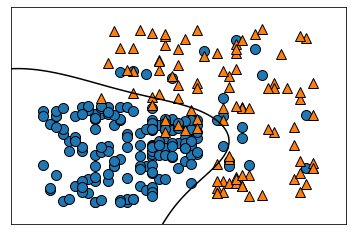

In [22]:
mglearn.plots.plot_2d_separator(classifier=svm, X=X_train)
mglearn.discrete_scatter(x1=X_train[:, 0], x2=X_train[:, 1], y=y_train)

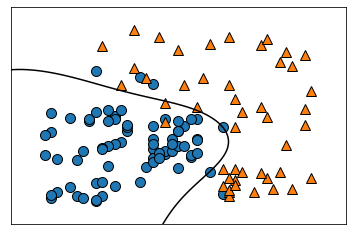

In [23]:
mglearn.plots.plot_2d_separator(classifier=svm, X=X_test)
mglearn.discrete_scatter(x1=X_test[:, 0], x2=X_test[:, 1], y=y_test)